# Initial data exploration, following-up on the provided starter notebook

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
import seaborn as sns

from ipywidgets import widgets
from IPython.display import display

import numpy as np
import pandas as pd

In [4]:
dtypes={
    'elapsed_time':np.int32,
    'event_name':'category',
    'name':'category',
    'level':np.uint8,
    'page':np.float32,
    'room_coor_x':np.float32,
    'room_coor_y':np.float32,
    'screen_coor_x':np.float32,
    'screen_coor_y':np.float32,
    'hover_duration':np.float32,
    'text':'category',
    'fqid':'category',
    'room_fqid':'category',
    'text_fqid':'category',
    'fullscreen':'category',
    'hq':'category',
    'music':'category',
    'level_group':'category'}
trainData = pd.read_csv('./train.csv', dtype=dtypes)

In [15]:
labels = pd.read_csv('./train_labels.csv')
labels['session'] = labels.session_id.apply(lambda x: int(x.split('_')[0]) )
labels['q'] = labels.session_id.apply(lambda x: int(x.split('_')[-1][1:]) )

In [7]:
trainData[ trainData['session_id'] == 20090312431273200 ]

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991394,-159.314682,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,20090312431273200,927,1267357,navigate_click,undefined,22,NaN,927.307251,-10.355928,838.0,335.0,NaN,NaN,tomap,tunic.historicalsociety.entry,NaN,0,0,1,13-22
877,20090312431273200,928,1268292,map_hover,basic,22,NaN,NaN,NaN,NaN,NaN,366.0,NaN,tomap,tunic.historicalsociety.entry,NaN,0,0,1,13-22
878,20090312431273200,929,1269474,map_click,undefined,22,NaN,457.523010,22.141338,443.0,316.0,NaN,NaN,tunic.capitol_2,tunic.historicalsociety.entry,NaN,0,0,1,13-22
879,20090312431273200,930,1270708,navigate_click,undefined,22,NaN,224.190323,-60.268669,404.0,337.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,0,0,1,13-22


In [8]:
labels.head(5)

,session_id,correct,session,q
0,20090312431273200_q1,1,20090312431273200,1
1,20090312433251036_q1,0,20090312433251036,1
2,20090312455206810_q1,1,20090312455206810,1
3,20090313091715820_q1,0,20090313091715820,1
4,20090313571836404_q1,1,20090313571836404,1


## Initial exploration of the labels dataset

<BarContainer object of 17 artists>

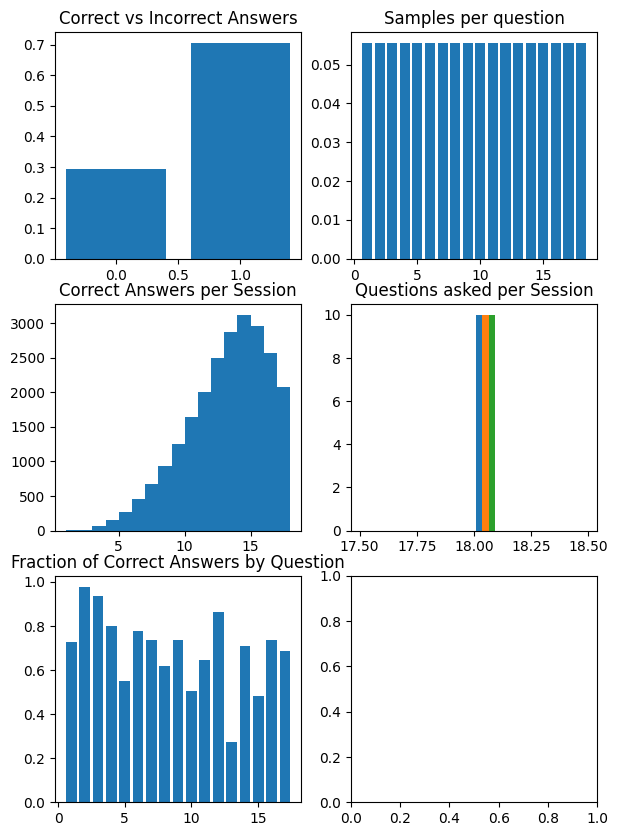

In [208]:
figsize(7,10)

plt.subplots(3,2)

plt.subplot(3,2,1)
plt.title('Correct vs Incorrect Answers')
xs  = np.array([0,1])
plt.bar(xs, labels.correct.value_counts()[xs] / labels.shape[0] )


plt.subplot(3,2,2)
plt.title('Samples per question')
xs = np.array( range(1,19) )
plt.bar(xs, labels.q.value_counts()[xs] / labels.shape[0] )


plt.subplot(3,2,3)
plt.title('Correct Answers per Session')
numCorrect = labels.groupby('session').agg({'correct':sum})
plt.hist(numCorrect, bins=range(1,19) );


plt.subplot(3,2,4)
plt.title('Questions asked per Session')
plt.hist(labels.groupby('session').count(), density=True);


plt.subplot(3,2,5)
plt.title('Fraction of Correct Answers by Question')
frequencyCorrect = labels.groupby('q').agg({'correct': 'mean'})['correct']
xs = np.array(range(1,18))
plt.bar(xs, frequencyCorrect[xs])





### I'm curious about serial dependencies in the correctness of questions answered.

Does answering a question correctly or incorrectly depend on your performance on previous questions?




In [10]:
questionCorrelation = labels.pivot(columns='q', index='session', values='correct').corr()
questionCorrelation

q,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
q,,,,,,,,,,,,,,,,,,
1,1.000000,0.104612,0.145984,0.205323,0.213051,0.219326,0.170244,0.105933,0.201948,0.198730,0.140252,0.120863,0.118345,0.172667,0.179079,0.056923,0.050269,0.098157
2,0.104612,1.000000,0.098626,0.130979,0.082675,0.090635,0.076437,0.049119,0.093251,0.065568,0.046264,0.064816,0.032527,0.092758,0.070817,0.018498,0.019856,0.065822
3,0.145984,0.098626,1.000000,0.114265,0.089836,0.103975,0.078951,0.040016,0.086082,0.077595,0.054907,0.060594,0.042409,0.079083,0.067743,0.034747,0.038931,0.062538
4,0.205323,0.130979,0.114265,1.000000,0.260613,0.224691,0.208314,0.148880,0.229009,0.186525,0.139947,0.138538,0.080244,0.217454,0.207600,0.038710,0.030767,0.118804
5,0.213051,0.082675,0.089836,0.260613,1.000000,0.244466,0.200950,0.154698,0.260854,0.215401,0.159850,0.134487,0.147850,0.212882,0.231459,0.064135,0.050052,0.100636
6,0.219326,0.090635,0.103975,0.224691,0.244466,1.000000,0.255103,0.105193,0.273214,0.209123,0.175910,0.162366,0.128619,0.205613,0.209093,0.071574,0.084769,0.143524
7,0.170244,0.076437,0.078951,0.208314,0.200950,0.255103,1.000000,0.080727,0.166041,0.176082,0.156152,0.148884,0.065737,0.161098,0.196286,0.072021,0.096924,0.135593
8,0.105933,0.049119,0.040016,0.148880,0.154698,0.105193,0.080727,1.000000,0.158802,0.112905,0.074169,0.071604,0.107572,0.112578,0.118730,0.010838,0.000431,0.047899
9,0.201948,0.093251,0.086082,0.229009,0.260854,0.273214,0.166041,0.158802,1.000000,0.195097,0.141468,0.140992,0.148061,0.226458,0.214957,0.045927,0.042194,0.098389


<AxesSubplot:xlabel='q', ylabel='q'>

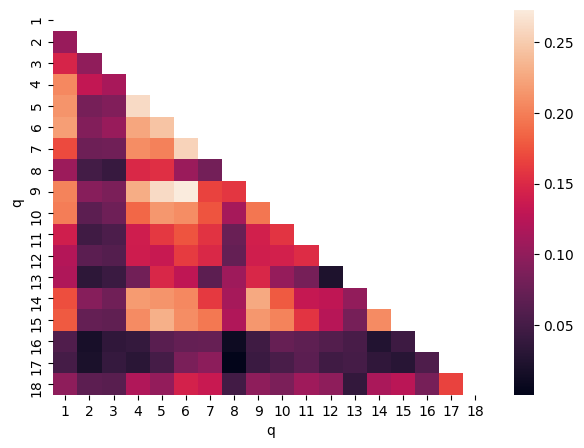

In [11]:
figsize(7,5)
mask = np.triu(np.ones_like(questionCorrelation, dtype=bool))
sns.heatmap(questionCorrelation, mask=mask)

There seems to be a reasonable amount of structure here, even in a simple pairwise analysis

## initial exploration of the training data set

### q: How many events does each session id see?

In [154]:
eventsPerPlayer = trainData['session_id'].value_counts().to_frame('num_events')
playerScore = labels.groupby('session').agg('sum')

pairedScore = eventsPerPlayer.join(playerScore)

Text(0.5, 0, 'Total Score')

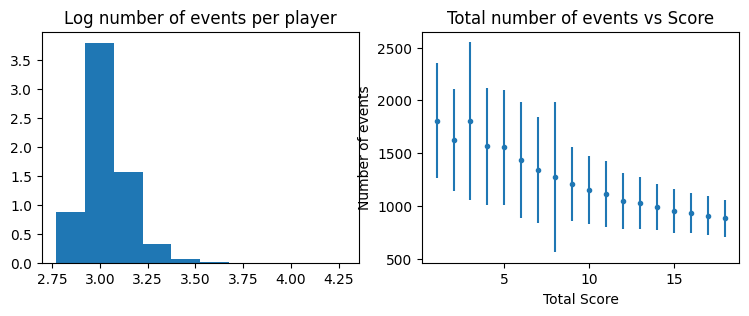

In [209]:
figsize(9, 3)
plt.subplots(1, 2)

plt.subplot(1,2,1)
plt.title('Log number of events per player')
plt.hist(np.log10(eventsPerPlayer), density=True );

plt.subplot(1,2,2)
plt.title('Total number of events vs Score')
summary = pairedScore.groupby('correct').agg(['median', 'var'])
plt.errorbar(np.array(summary.index), summary['num_events']['median'],
             yerr=  summary['num_events']['var']**0.5 ,fmt='.')

plt.ylabel('Number of events')
plt.xlabel('Total Score')

The number of events varies over a large magnitude (up to 19k!). Theres not a huge correlation with the number of correct questions, but there does seem to be a somewhat of a negative correlation. Moreover, the variance in the number of events appears to decrease as the total score increases.

Note however, that we have pretty low sample numbers (<500) for total scores less than ~7. Question: is this decrease in variance significant?

On a scientific level, this leads me to believe that there is not a great amount of disengagement among players, but instead a struggling to understand / operate the game mechanics.



### Exploring the event structure

I'd like to understand how the different locations, events, and texts are related to each other

In particular, it appears that many events can only happen in certain locations, etc.
For example, all notebook click events have a page, and all events with a page are notebook clicks:

In [90]:
eventsWithPage = trainData[ np.logical_not( np.isnan( trainData['page'] ) ) ]
print('All page events are notebook_click:', (eventsWithPage['event_name'] == 'notebook_click').all() )

events_notebookClick = trainData[trainData['event_name'] == 'notebook_click']
print('All notebook_clicks have a page:',  np.logical_not( np.isnan( events_notebookClick['page'] )).all()  )

All page events are notebook_click: True
All notebook_clicks have a page: True


However, the page events are not fully explained by the notebook_click

page residual entropy: 1.9184231576574358
event_name residual entropy: 0.0


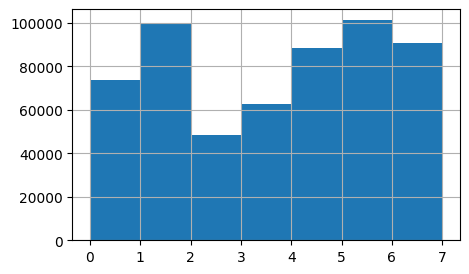

In [91]:
from scipy.stats import entropy
figsize(5,3)
events_notebookClick['page'].hist(bins=range(8))
print('page residual entropy:', entropy( events_notebookClick['page'].value_counts() ) )
print('event_name residual entropy:', entropy( eventsWithPage['event_name'].value_counts() ) )

So, just like a decision tree, we can form a tree structure over the events by looking for places where the entropy of the one dimension, conditioned on the other, _goes to zero_.

In [80]:
eventStateVariables = ['event_name', 'name', 'level', 'page', 'text', 
                  'fqid', 'room_fqid', 'text_fqid', 'level_group']

In [213]:
trainData[eventStateVariables].nuniquenique()

event_name      11
name             6
level           23
page             7
text           597
fqid           128
room_fqid       19
text_fqid      126
level_group      3
dtype: int64

In [328]:
def isUniform(column):
    # test if all entries in the column have the same value
    return (column == column.iloc[0]).all()

def findSupersets(data, columnNames):
    # brute force search for column values that, 
    # when conditioned on, result in a different column being uniform 
    results = []

    for filterColumn in columnNames:
        filterData = data[filterColumn]
        possibleValues = filterData.cat.categories

        for testColumn in columnNames:
            if testColumn == filterColumn:
                continue
            testData = data[testColumn]
            
            if pd.isnull(filterData).any():
                # test with nan values
                restrictedData = testData[ pd.isnull(filterData) ]
                if isUniform(restrictedData):
                    results.append( 
                        (filterColumn, float('nan'), True, testColumn, restrictedData.iloc[0]) )

                restrictedData = testData[ np.logical_not( pd.isnull(filterData) ) ]
                if isUniform(restrictedData):
                    results.append( 
                        (filterColumn, float('nan'), False, testColumn, restrictedData.iloc[0]) )

            for value in possibleValues:
                restrictedData = testData[filterData == value]
                if isUniform(restrictedData):
                    results.append( 
                        (filterColumn, value, True, testColumn, restrictedData.iloc[0]) )

                restrictedData = testData[filterData != value]
                if isUniform(restrictedData):
                    results.append( 
                        (filterColumn, value, False, testColumn, restrictedData.iloc[0]) )
            print(testColumn)
        print('epoch', filterColumn, len(results))
    return results
            
    

In [329]:
d = trainData[eventStateVariables].astype('category')

graphResults = findSupersets(d, eventStateVariables)

name
level
page
text
fqid
room_fqid
text_fqid
level_group
epoch event_name 7
event_name
level
page
text
fqid
room_fqid
text_fqid
level_group
epoch name 10
event_name
name
page
text
fqid
room_fqid
text_fqid
level_group
epoch level 34
event_name
name
level
text
fqid
room_fqid
text_fqid
level_group
epoch page 52
event_name
name
level
page
fqid
room_fqid
text_fqid
level_group
epoch text 4647
event_name
name
level
page
text
room_fqid
text_fqid
level_group
epoch fqid 4904
event_name
name
level
page
text
fqid
text_fqid
level_group
epoch room_fqid 4910
event_name
name
level
page
text
fqid
room_fqid
level_group
epoch text_fqid 5782
event_name
name
level
page
text
fqid
room_fqid
text_fqid
epoch level_group 5782


In [3]:
workingData = pd.DataFrame(graphResults)
workingData.to_csv('stateGraph.csv')

NameError: name 'graphResults' is not defined

In [3]:
workingData = pd.read_csv('stateGraph.csv', dtype='category')
workingData = workingData.drop(columns=['Unnamed: 0'])

workingData = workingData.rename(columns={'0': 'filterCat', '1': 'filterVar', '2': 'InOut', 
                    '3': 'targetCat', '4':'targetVar'})


workingData['filterId'] = workingData['filterCat'].astype(str) + ':' + workingData['filterVar'].astype(str)
workingData['targetId'] = workingData['targetCat'].astype(str) + ':' + workingData['targetVar'].astype(str)

workingData = workingData.astype('category')

### Further processing is required:

If a specifies b and b specifies c, then a specifies c. How to remove these higher order dependencies?

In [4]:
def findRoots(dataSlice):
    # find targets values that are never filtered on in this dataset
    return dataSlice.loc[ ~dataSlice.targetId.isin( dataSlice.filterId ) ].targetId.unique()


def makeMultiTree(edges):
    rootIds = findRoots(edges)
    
    treeEdges = []
    for rootId in rootIds:    
        childNodes = edges[ edges.targetId == rootId ].filterId.unique()
        
        soloNodes = childNodes[ 
            np.logical_and( ~childNodes.isin(edges.targetId), ~childNodes.isin(edges.filterId)) 
        ]
        
        
        for nodeId in soloNodes:
            treeEdges.append( (nodeId, rootId) )
        
        childData = edges.loc[ edges.targetId.isin( childNodes ) ]
        childRoots, childEdges = makeMultiTree(childData)
        
        for nodeId in childRoots:
            treeEdges.append( (nodeId, rootId) )

        treeEdges.extend( childEdges )
        
    return rootIds, treeEdges



In [5]:
_, tree = makeMultiTree(workingData)

[]
[]
[]


In [52]:
cutTree = filter( lambda edge: \
                 (edge[0].split(':')[0] != 'text' and edge[0].split(':')[0] != 'text_fqid'), 
                 tree  )

#cutTree = map( lambda edge: (edge[1], edge[0]), cutTree)

In [53]:
import networkx as nx
from pyvis.network import Network

graph = nx.from_edgelist(cutTree)
net = Network(notebook=True, directed=True)
net.from_nx(graph)

In [54]:
net.show('test.html')

test.html


Ok, so that didn't come out very cleanly. The problem is that, for example, events in levels 1 and 2 can share event types, so the graph is connected.

What if we instead search for variables that are completely determined by the value of another. Ie, level group is determined by level.

That is to say, for any value of the filter variable, the target is totally determined.

In [310]:
#d = trainData[eventStateVariables].astype('category')

AdeterminesB = []

for knownTarget in workingData.targetCat.unique():
    possibleCategories = workingData[ workingData.targetCat == knownTarget].filterCat.unique()

    
    for knownCategory in possibleCategories:
        specifyingValues = workingData[ 
            (workingData.targetCat == knownTarget) &
            (workingData.filterCat == knownCategory) 
        ]['filterVar']
        
        
        if set( map( lambda x: str(x), specifyingValues.unique() ) ) \
            ==  set( map( lambda x: str(x), d[knownCategory].unique() ) ):
            AdeterminesB.append( (knownCategory, knownTarget) )
        


In [311]:
AdeterminesB

[('text', 'name'),
 ('text_fqid', 'name'),
 ('page', 'event_name'),
 ('level', 'level_group')]

Maybe this is the best we can do...

### I've been thinking about how to operationalize the idea behind this analysis, namely that there aren't that many combinations of different events, levels, fqids, etc.

One way to take advantage of this would be to group combinations, with the idea that the dimensionality wouldn't be too high due to the lack of many combinations

In [2]:
dtypes={
    'elapsed_time':np.int32,
    'event_name':'category',
    'name':'category',
    'level':'category',
    'page':'category',
    'room_coor_x':np.float32,
    'room_coor_y':np.float32,
    'screen_coor_x':np.float32,
    'screen_coor_y':np.float32,
    'hover_duration':np.float32,
    'text':'category',
    'fqid':'category',
    'room_fqid':'category',
    'text_fqid':'category',
    'fullscreen':'category',
    'hq':'category',
    'music':'category',
    'level_group':'category'}
trainData = pd.read_csv('./train.csv', dtype=dtypes)

In [3]:
eventVars = ['event_name', 'name', 'level',  'page', 'text', 'fqid', 'room_fqid', 'text_fqid' ]

nCombinations = 1
for columnName in eventVars:
    nCombinations *= len( trainData[columnName].cat.categories )

print(nCombinations)

1943919419904


This is a massive number of dimensions.

However, they don't all occur simultaneously.

In [4]:
# make nan a value of its own.
eventVars = ['event_name', 'name', 'level',  'page', 'text', 'fqid', 'room_fqid', 'text_fqid' ]

for column in eventVars:
    trainData[column] = trainData[column].cat.add_categories(['-1'])
    trainData[column] = trainData[column].fillna('-1')


In [5]:
groups = trainData[eventVars].groupby(eventVars, observed=True)

In [6]:
counts = groups.size()

In [9]:
counts.shape

(7193,)

Obviously, this is a significantly smaller state space to work with. Is it small enough?